# 演習問題3.3

Weight vector:
[  81.  198.  196.  342.  410.  370.  416. -686. -174.   28.]


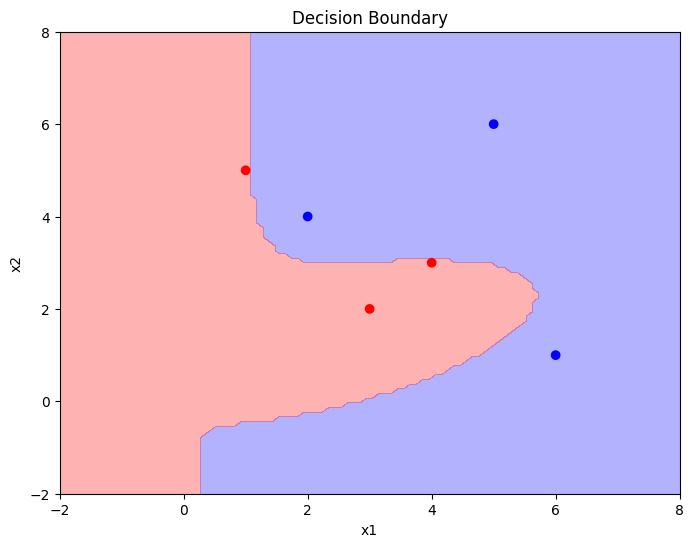

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 学習パターンとクラスの定義
patterns = np.array([[1, 5],
                    [3, 2],
                    [4, 3],
                    [5, 6],
                    [2, 4],
                    [6, 1]])

classes = np.array([1, 1, 1, -1, -1, -1])

# 特徴空間への写像関数 Φ(x)
def map_features(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([1, x1, x2, x1*x2, x1**2, x2**2, x1**2*x2, x1*x2**2, x1**3, x2**3])

# 重みベクトルの初期化
w = np.zeros(10)

# 学習係数
ρ = 1

# 収束条件
max_iterations = 100
converged = False

# 基本パーセプトロンの学習規則
for _ in range(max_iterations):
    for i in range(len(patterns)):
        x = map_features(patterns[i])
        b = classes[i]

        if np.dot(w, x) * b <= 0:
            w = w + ρ * b * x
            converged = False

    if converged:
        break
    else:
        converged = True

# 求めた重みベクトルを表示
print("Weight vector:")
print(w)

# 決定境界の図示
x1 = np.linspace(-2, 8, 100)
x2 = np.linspace(-2, 8, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[X1.ravel(), X2.ravel()]
Z = np.dot(np.apply_along_axis(map_features, 1, X), w)
Z = np.sign(Z).reshape(X1.shape)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=1, alpha=0.3, colors=['blue', 'red'])
plt.scatter(patterns[:, 0], patterns[:, 1], c=classes, cmap='bwr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

###ChatGPTの解説

- 基本パーセプトロンは次の手順で行われています

1. patternsとclassesには学習パターンとそれに対応するクラスラベルが与えられています.
2. map_features関数は, 2次元の学習パターンを $10$ 次元の特徴空間に写像するための関数です. 写像後の特徴ベクトルを返します.
3. 重みベクトルwは $10$ 次元の特徴空間の次元に対応する重みを持つ初期化されたベクトルです.
4. 学習係数 $ρ$ は $1$ に設定されています.
5. 収束条件は, 最大反復回数max_iterationsが $1000$ 回とし, 重みベクトルが更新されなくなった時に収束したとみなします.
6. 基本パーセプトロンの学習規則を適用して, 重みベクトルを更新しています.
7. 学習データの特徴ベクトル $x$ とクラスラベル $b$ を用いて, 重みベクトルを更新します.
学習が収束した場合には, 収束フラグconvergedをTrueにしてループを終了します.
8. 求めた重みベクトル $w$ を表示しています.


- 決定境界の図示は次の手順で行われています

1. 2次元の特徴空間の $x_{1}$ と $x_{2}$ の値を $-2$ から $8$ まで $100$ 等分した点を生成しています.
2. $X_{1}$ と $X_{2}$ はこれらの点から作成された格子状の座標行列です.
3. 特徴空間に写像された点 $X$ を計算して, 重みベクトル $w$ との内積を取り, 予測クラスを求めています.
4. 得られた予測クラスを $1$ か $-1$ に変換して, $2$ 次元の座標行列 $Z$ に変形しています。
5. plt.contourfを使って, 決定境界を等高線プロットしています. 学習パターンはplt.scatterを使ってプロットしています.